# Implemrntation of Multilinear regression from scratch and applied to Boston dataset fron Kaggle

In [1]:
# import necessary packages
import numpy as np
import pandas as pd  
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [14]:
# Import the dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [17]:
X = data.iloc[:,[2,4,5,9,10,12]] #independent columns
y = data.iloc[:,[-1]] #target column i.e price range

In [18]:
X.head()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT
0,2.31,0.538,6.575,296.0,15.3,4.98
1,7.07,0.469,6.421,242.0,17.8,9.14
2,7.07,0.469,7.185,242.0,17.8,4.03
3,2.18,0.458,6.998,222.0,18.7,2.94
4,2.18,0.458,7.147,222.0,18.7,5.33


In [19]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.209, random_state=5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 6)
(106, 6)
(400, 1)
(106, 1)


In [21]:
def model(X, Y, learning_rate, iteration):
    m = Y.size
    theta = np.zeros((X.shape[1], 1))
    cost_list = []
    
    for i in range(iteration):
        y_pred = np.dot(X, theta)
        cost = (1/(2*m))*np.sum(np.square(y_pred - Y))
        d_theta = (1/m)*np.dot(X.T, y_pred - Y)
        theta = theta - learning_rate*d_theta
        cost_list.append(cost)
        
        # to print the cost for 10 times
        if(i%(iteration/10) == 0):
            print("Cost is :", cost)
    return theta, cost_list

In [23]:
iteration = 100000
learning_rate = 0.000005
theta, cost_list = model(x_train, y_train, learning_rate = learning_rate, iteration =
iteration)

Cost is : MEDV    298.41635
dtype: float64
Cost is : MEDV    31.622241
dtype: float64
Cost is : MEDV    28.282067
dtype: float64
Cost is : MEDV    26.905755
dtype: float64
Cost is : MEDV    25.776761
dtype: float64
Cost is : MEDV    24.771357
dtype: float64
Cost is : MEDV    23.862527
dtype: float64
Cost is : MEDV    23.038287
dtype: float64
Cost is : MEDV    22.290209
dtype: float64
Cost is : MEDV    21.611141
dtype: float64


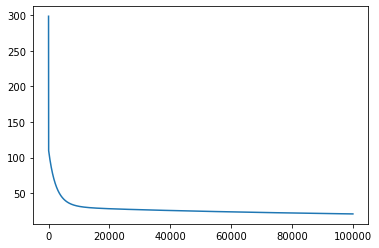

In [24]:
rng = np.arange(0, iteration)
plt.plot(rng, cost_list)
plt.show()

In [25]:
y_pred = np.dot(x_test, theta)
error = (1/x_test.shape[0])*np.sum(np.abs(y_pred - y_test))

In [26]:
print("Test error is :", error*100, "%")
print("Test Accuracy is :", (1- error)*100, "%")

Test error is : MEDV    471.769621
dtype: float64 %
Test Accuracy is : MEDV   -371.769621
dtype: float64 %
